In [5]:
#import necessary libraries

import tensorflow as tf
from tensorflow import keras
import numpy as np
import  matplotlib.pyplot as plt


In [11]:
#now we will load ourData
from keras.datasets import mnist

(X_train,Y_train),(X_test,Y_test)=mnist.load_data()

In [12]:
X_train.shape

(60000, 28, 28)

In [13]:
Y_train.shape

(60000,)

In [14]:
Y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

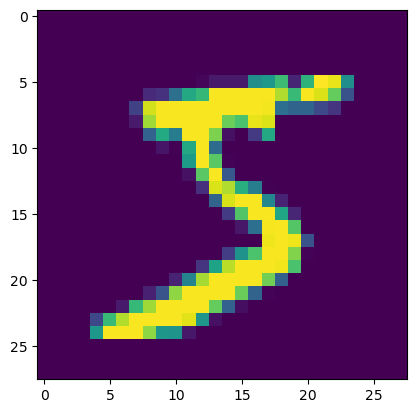

In [9]:
#seeing what the digits look like
plt.imshow(X_train[0])

In [10]:
Y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [17]:
#swe will one-hot-encode our target variable

from keras.utils import to_categorical
Y_train=to_categorical(Y_train)
Y_test=to_categorical(Y_test)

In [18]:
Y_train[0]   #since 6th position(0,1,2,3,4,5) is "1"
               #it represent the digit 5

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [19]:
Y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [21]:
#now we build our model
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Flatten,MaxPool2D


In [47]:
#creating the model
model=Sequential()

#adding conv layers

model.add(Conv2D(20,kernel_size=9,activation='relu',input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=2,strides=2))

model.add(Conv2D(64,kernel_size=3,activation='relu',input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=2,strides=2))

model.add(Conv2D(32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))
#flattening
model.add(Flatten())

#adding FC layer
model.add(Dense(10,activation='softmax'))

In [48]:
#compiling
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [49]:
#fitting the model
model.fit(X_train,Y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4209 - accuracy: 0.9157
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0998 - accuracy: 0.9710
Epoch 3/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0857 - accuracy: 0.9757
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0753 - accuracy: 0.9787
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0687 - accuracy: 0.9806
Epoch 6/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0633 - accuracy: 0.9823
Epoch 7/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0572 - accuracy: 0.9842
Epoch 8/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0516 - accuracy: 0.9854
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0492 - accuracy: 0.9860
Epoch 10/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.045

In [50]:
model.evaluate(X_test,Y_test,batch_size=10)

1000/1000 [==============================] - 1s 790us/step - loss: 0.0709 - accuracy: 0.9819


[0.07088938355445862, 0.9818999767303467]

In [51]:
#predicting
y_pred=model.predict(X_test)

313/313 [==============================] - 1s 1ms/step


In [52]:
#digit at 4th position
Y_test[3]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

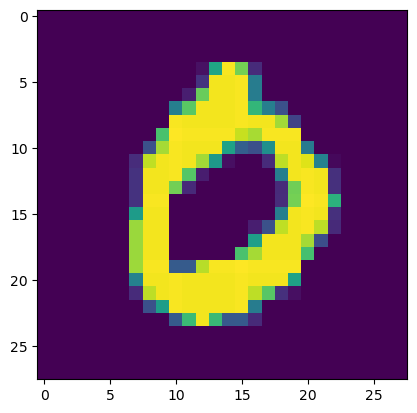

In [53]:
plt.imshow(X_test[3])

In [54]:
#predicted digit at 4th position
np.argmax(y_pred[3])

0

In [55]:
true_value=[np.argmax(i) for i in Y_test]
true_value[:5]

[7, 2, 1, 0, 4]

In [56]:
pred_value=[np.argmax(i) for i in y_pred]
pred_value[:5]

[7, 2, 1, 0, 4]

In [57]:
#data visualisation 
cm=tf.math.confusion_matrix(true_value,pred_value)
cm


<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 971,    0,    0,    0,    0,    0,    7,    1,    0,    1],
       [   8, 1124,    1,    2,    0,    0,    0,    0,    0,    0],
       [   3,    3, 1001,   11,    1,    0,    3,    9,    1,    0],
       [   0,    0,    0, 1002,    0,    5,    0,    0,    1,    2],
       [   1,    0,    1,    0,  963,    0,    4,    3,    2,    8],
       [   1,    1,    0,    8,    0,  871,    5,    0,    0,    6],
       [   2,    3,    0,    0,    2,    4,  947,    0,    0,    0],
       [   1,    2,    2,    1,    0,    1,    0, 1019,    0,    2],
       [  11,    0,    0,    2,    2,    3,    3,    1,  941,   11],
       [   0,    0,    0,    1,   15,    5,    0,    7,    1,  980]],
      dtype=int32)>

Text(45.722222222222214, 0.5, 'True value')

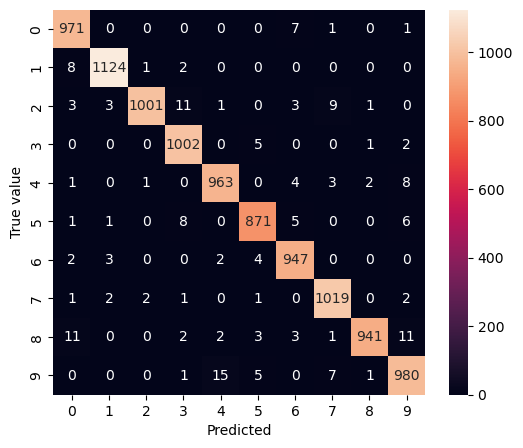

In [60]:
import seaborn as sb

plt.figure(figsize=(6,5))
sb. heatmap (cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel("True value")